In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as pc
import os
import itertools

In [8]:
df=pd.read_excel('KEGG_Pathway/KEGG_PathwayKO(pathway).xlsx',index_col=0)
Pathway_list=df.columns.to_list()
count = df.count().transpose()
count_list=count.to_list()
ko_Position=np.cumsum(count_list)
column=pd.melt(df)
column_value= column.value.tolist()
new_column = [x for x in column_value if pd.isnull(x) == False]  # removed 'nan'
all_koname=list(set(new_column))

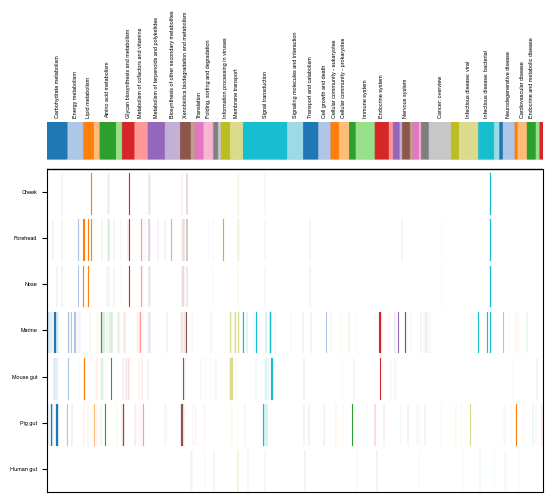

In [9]:
del_dir1='bimodal genes'
filelist1 = ['3_countries_combined_BiDgenes', 'Pig_BiDgenes', 'Mouse_BiDgenes', 'Marine_BiDgenes', 'Human_nose_BiDgenes', 'Human_forehead_BiDgenes', 'Human_cheek_BiDgenes']
filelist2 = ['Human gut', 'Pig gut', 'Mouse gut', 'Marine', 'Nose', 'Forehead', 'Cheek']

fig = plt.figure()  
ax = fig.add_subplot(111)  
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family'] = 'Arial'
tab20 = plt.get_cmap('tab20')
color = itertools.cycle(tab20.colors)
colors = list(itertools.islice(color, 60))
plt.xlim(0, len(new_column)) 
plt.ylim(0, len(new_column)*(len(filelist1)+1)/30)
threshold = 400 #Control the precondition for label display and filter out small pathways.
indexs = [index for index, value in enumerate(count_list) if value > threshold]
xlabels=[Pathway_list[i] for i in indexs ]
mid_position=[(ko_Position[0]+0)/2]+[(ko_Position[i]+ko_Position[i-1])/2 for i in range(len(ko_Position)) if i!=0]
xticks=[mid_position[i] for i in indexs]
ax.xaxis.set_ticks_position('top')
plt.xticks(ticks=xticks,labels=xlabels,rotation=90,fontsize=4,fontfamily='Arial')
ax.tick_params(axis='x', which='both', length=0)
ax.spines['left'].set_bounds(0, len(new_column)*(len(filelist1))/30)  
ax.spines['right'].set_bounds(0, len(new_column)*(len(filelist1))/30) 

plt.yticks(ticks=np.arange(0.5*len(new_column)/30,((len(filelist1)+0.5))*len(new_column)/30,
                           len(new_column)/30),labels=filelist2,fontsize=4,fontfamily='Arial')
plt.gca().spines['top'].set_visible(False)
ax.plot([0,len(new_column)],[(len(filelist1))*len(new_column)/30,(len(filelist1))*len(new_column)/30],linewidth=1.0,color='black')
#plot
for a in range(len(filelist1)):
    del_file=del_dir1+'/'+filelist1[a]
    df1=pd.read_csv(del_file,delimiter='\t') 
    ko_name=df1.iloc[:,0]
    for j in range(len(ko_name)):
        position=[i for i , x in enumerate(new_column) if x==ko_name[j]]
        for k in range (len(position)):
            for H in range(len(ko_Position)):
                if H==0 and position[k]<ko_Position[H]:
                    ax.add_patch(pc.Rectangle((position[k],a*len(new_column)/30),
                                              10,0.90*len(new_column)/30,linewidth=0.1,color=colors[H],alpha=1.0))
                if H>0 and ko_Position[H-1]<=position[k]<ko_Position[H]:
                    ax.add_patch(pc.Rectangle((position[k],a*len(new_column)/30),
                                              10,0.90*len(new_column)/30,linewidth=0.1,color=colors[H],alpha=1.0))
#legend                
for j in range(len(all_koname)):
    position=[i for i , x in enumerate(new_column) if x==all_koname[j]]
    for k in range (len(position)):
        for H in range(len(ko_Position)):
            if H==0 and position[k]<ko_Position[H]:
                ax.add_patch(pc.Rectangle((position[k],(len(filelist1)+0.2)*len(new_column)/30),
                                          10,0.90*len(new_column)/30,linewidth=0.1,color=colors[H],alpha=1.0))
            if H>0 and ko_Position[H-1]<=position[k]<ko_Position[H]:
                ax.add_patch(pc.Rectangle((position[k],(len(filelist1)+0.2)*len(new_column)/30),
                                          10,0.90*len(new_column)/30,linewidth=0.1,color=colors[H],alpha=1.0))
plt.savefig('fig/bimdal genes distribution in pathway.pdf',bbox_inches='tight')